In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import rmsprop_v2
from tensorflow.keras.optimizers import Adam
import cv2


In [2]:
%pip install matplotlib_inline

Note: you may need to restart the kernel to use updated packages.


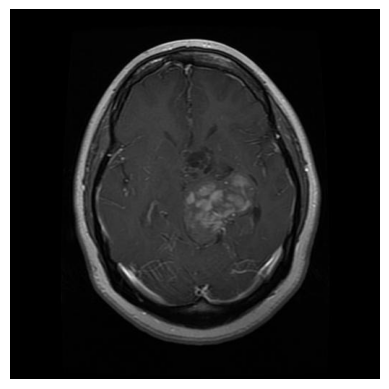

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

DATA = r'D:\Sem5\BTL_Python\Cancer-Diagnosis-AI-based-System\web\ModelAI\data\Training'  # reading the data
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]  # defining the 4 categories

for category in CATEGORIES:
    path = os.path.join(DATA, category)
    for img in os.listdir(path):
        if img.endswith('.DS_Store'):
            continue

        img_array = cv2.imread(os.path.join(path, img))  # Read the image
        
        if img_array is None:
            print(f"Failed to load image: {img}")
            continue
        
        img_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert to RGB

        plt.imshow(img_rgb)  # Display the image
        plt.axis("off")  # Turn off the axes
        plt.show()
        break  # To only show the first image in each category
    break  # To only show the first category's image

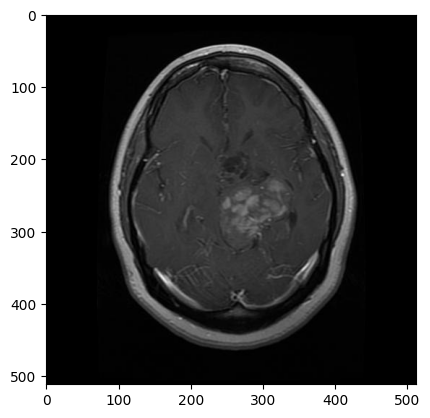

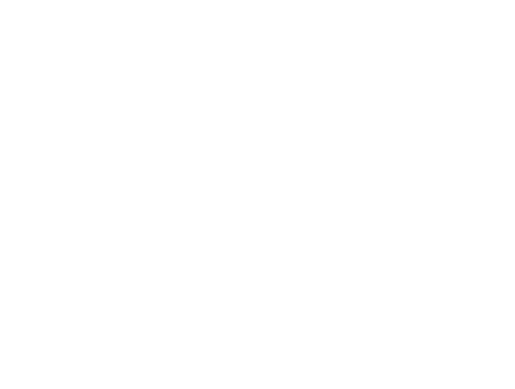

In [4]:
DATA = 'D:\Sem5\BTL_Python\Cancer-Diagnosis-AI-based-System\web\ModelAI\data\Training' #reading the data
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] #defining the 4 categories that we have
for category in CATEGORIES:
    path = os.path.join(DATA,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        if img_array is not None:
            plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
            plt.show()
            plt.axis("off")
            break
    break

(-0.5, 149.5, 149.5, -0.5)

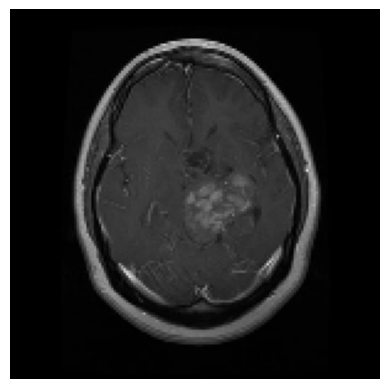

In [5]:
IMG_SIZE = 150
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.axis("off")
#resize để tất cả ảnh có cùng kích thước, giúp cho việc xử lý ảnh dễ dàng hơn

In [6]:
training_data = [] #manipulating our training data

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA,category)
        class_num = CATEGORIES.index(category) #defining the different categories of the images in our data
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                #resize tất cả hình ảnh của file trong folder.
                training_data.append([new_array,class_num]) #adding our data in to the training_data list which we will use to define our X and y for train-tets split
                #Thêm vào mảng traing_data 1 cặp gồm ảnh và nhãn. (0: gioma_tumor, 1: meningioma_tumor, 2: no_tumor, 3: pituitary_tumor)
            except Exception as e:
                pass
create_training_data()

In [7]:
X = [] #used for storing  the features
y = [] #used for storing the labels
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
#print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)
print(X.shape)

(8582, 150, 150, 1)


In [8]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes = 4)

In [9]:
from sklearn.model_selection import train_test_split #splitting the data into training and validaton set
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (6865, 150, 150, 1)
x_test shape (1717, 150, 150, 1)
y_train shape (6865, 4)
y_test shape (1717, 4)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])



optimizer1 = Adam(learning_rate=0.001)
#Sử dụng thuật toán tối ưu Adam để tối ưu bài toán (thay đổi learning rate phù hợp cho đạo hàm)  # Specify the learning rate using 'learning_rate' parameter
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer1,
              metrics=['accuracy'])
epochs = 50  
batch_size = 40
datagen = ImageDataGenerator(  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,864,260 (18.56 MB)

 Trainable params: 4,864,260 (18.56 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
datagen.fit(X_train)
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val))   

Epoch 1/50


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


172/172 ━━━━━━━━━━━━━━━━━━━━ 137s 783ms/step - accuracy: 0.4499 - loss: 1.1741 - val_accuracy: 0.7152 - val_loss: 0.6649
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 166s 968ms/step - accuracy: 0.7593 - loss: 0.5841 - val_accuracy: 0.8340 - val_loss: 0.4089
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.8184 - loss: 0.4563 - val_accuracy: 0.8532 - val_loss: 0.3592
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.8503 - loss: 0.3642 - val_accuracy: 0.8783 - val_loss: 0.2986
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.8805 - loss: 0.2920 - val_accuracy: 0.9167 - val_loss: 0.2327
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.8992 - loss: 0.2611 - val_accuracy: 0.9557 - val_loss: 0.1515
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9313 - loss: 0.1981 - val_accuracy: 0.9441 - val_loss: 0.1836
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9449 - loss: 0.1466 - val_accuracy:

In [14]:
file_path = r"D:\Sem5\BTL_Python\Cancer-Diagnosis-AI-based-System\web\ModelAI\model\training.log"

# Open and read the file content
with open(file_path, "r") as file:
    content = file.readlines()

# Show the first few lines of the file to understand its format
content[:10]

['epoch,accuracy,dice_coef,learning_rate,loss,mean_io_u,precision,sensitivity,specificity,val_accuracy,val_dice_coef,val_loss,val_mean_io_u,val_precision,val_sensitivity,val_specificity\n',
 '\n',
 '0,0.9820666909217834,0.27438175678253174,0.0010000000474974513,0.08118212223052979,0.6673325896263123,0.9824697971343994,0.9809573888778687,0.9941709041595459,0.9802403450012207,0.2847074270248413,0.07339252531528473,0.7034947276115417,0.9805639386177063,0.9796059131622314,0.9935322403907776\n',
 '\n',
 '1,0.0,0.0,0.0010000000474974513,0.0,0.0,0.0,0.0,0.0,0.9802406430244446,0.2847074270248413,0.07339251786470413,0.703494668006897,0.9805638194084167,0.979606032371521,0.9935323596000671\n',
 '\n',
 '2,0.9816299676895142,0.27278465032577515,0.0010000000474974513,0.09442165493965149,0.6820438504219055,0.9823914170265198,0.977667510509491,0.9941440224647522,0.9800307750701904,0.269918292760849,0.08852238208055496,0.8152827620506287,0.9798287153244019,0.9798550009727478,0.9933042526245117\n',
 '\

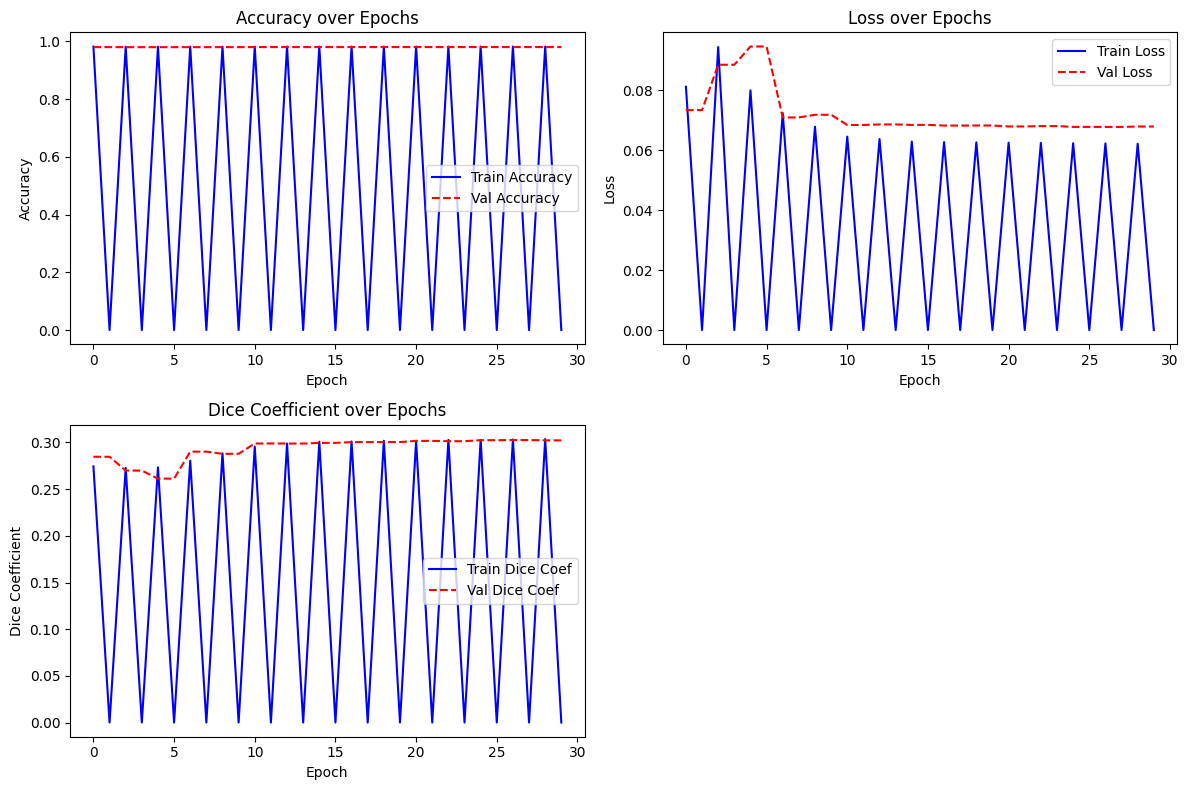

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas dataframe
df = pd.read_csv(file_path)

# Plot the training metrics over epochs
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['accuracy'], label='Train Accuracy', color='b')
plt.plot(df['epoch'], df['val_accuracy'], label='Val Accuracy', color='r', linestyle='--')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['loss'], label='Train Loss', color='b')
plt.plot(df['epoch'], df['val_loss'], label='Val Loss', color='r', linestyle='--')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot dice coefficient
plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['dice_coef'], label='Train Dice Coef', color='b')
plt.plot(df['epoch'], df['val_dice_coef'], label='Val Dice Coef', color='r', linestyle='--')
plt.title('Dice Coefficient over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [16]:
history =  tf.keras.models.load_model('D:\Sem5\BTL_Python\Cancer-Diagnosis-AI-based-System\web\ModelAI\model\BrainTumor.h5')

In [ ]:
# #model.save('D:/Sem5/MinhLam/Cancer-Diagnosis-AI-based-System/web/ModelAI/model/BrainTumor.h5')
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.legend(['loss', 'val_loss'])
# plt.title('Loss')
# plt.xlabel('epoch')

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.legend(['accuracy', 'val_accuracy'])
# plt.title('Accuracy')
# plt.xlabel('epoch')

In [17]:
model.save('BrainTumor.h5')

In [18]:
img_array = cv2.imread('D:\Sem5\BTL_Python\Cancer-Diagnosis-AI-based-System\web\ModelAI\data\Testing\no_tumor\image(4).jpg', cv2.IMREAD_GRAYSCALE)  # loading the images in grayscale
if img_array is not None:
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    print(new_array.shape)
else:
    print("Failed to load image.")

Failed to load image.


In [19]:
X = new_array.reshape(-1,150,150)
# print(X.shape)
X = X/255.0  
X = X.reshape(-1,150,150,1)
print(X.shape)

(3, 150, 150, 1)


In [20]:
res = model.predict(X)
hmm = res.argmax()
print(hmm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
6


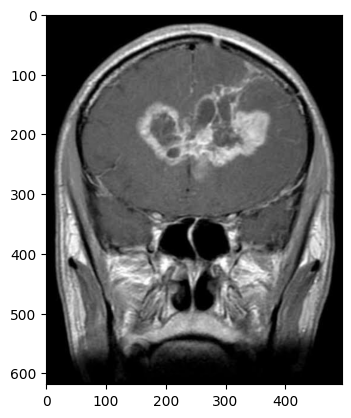

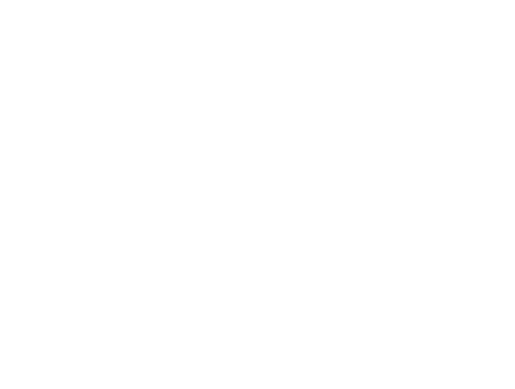

In [21]:
TEST = 'D:\Sem5\BTL_Python\Cancer-Diagnosis-AI-based-System\web\ModelAI\data\Testing' #reading the data
CATEGORIES_TEST = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"] #defining the 4 categories that we have
for category in CATEGORIES_TEST:
    # path_test = os.path.join(TEST,category)
    # for img in os.listdir(path_test):
    #     img_test = cv2.imread(os.path.join(path_test,img))
    #     if img_test is not None:
    #         img_test_rgb = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)  # Convert to RGB
    #         plt.imshow(img_test_rgb)
    #         plt.axis("off")
    #         plt.show()
    #     else:
    #         print(f"Failed to load image: {img}")
    #     break
    # break
    path = os.path.join(TEST,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        if img_array is not None:
            plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
            plt.show()
            plt.axis("off")
            break
    break

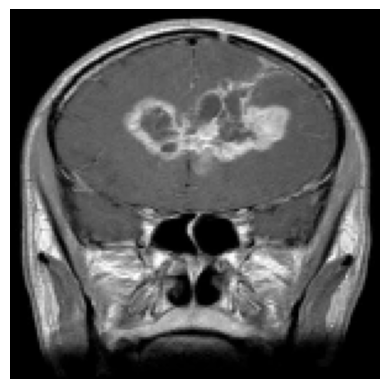

In [22]:
IMG_SIZE = 150
if img_array is not None and img_array.size != 0:
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array, cmap="gray")
    plt.axis("off")
else:
    print("img_array is empty or None")


In [23]:
testing_data = [] #manipulating our training data

def create_testing_data():
    for category in CATEGORIES_TEST:
        path_test = os.path.join(TEST,category)
        class_num_test = CATEGORIES_TEST.index(category) #defining the different categories of the images in our data
        for img_test in os.listdir(path_test):
            try:
                img_array_test = cv2.imread(os.path.join(path_test,img_test),cv2.IMREAD_GRAYSCALE) #loading the images in grayscale
                new_array_test = cv2.resize(img_array_test,(IMG_SIZE,IMG_SIZE)) 
                testing_data.append([new_array_test,class_num_test]) #adding our data in to the training_data list which we will use to define our X and y for train-tets split
            except Exception as e:
                pass
create_testing_data()

In [24]:
print(testing_data[233])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


In [25]:
print(testing_data[234])

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]


In [26]:
X_test = [] #used for storing  the features
y_test = [] #used for storing the labels
for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
#print(X.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,150,150,1)
print(X_test.shape)


(1705, 150, 150, 1)


In [27]:
res = model.predict(X_test[1].reshape(-1,IMG_SIZE,IMG_SIZE,1))
hm = res.argmax()
hm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


1

In [28]:
result = []
for i in range(1705):
    res = model.predict(X_test[i].reshape(-1,IMG_SIZE,IMG_SIZE,1))
    hm = res.argmax()
    result.append(hm)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

[2,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 3,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [29]:
y_test = np.array(y_test)
y_test

array([0, 0, 0, ..., 3, 3, 3])

In [30]:
result = np.array(result)
y_test = np.array(y_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(result, y_test)
print("Độ chính xác:", accuracy)


Độ chính xác: 0.9343108504398827
